In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [2]:
cd C:/Users/fjdur/Documents/utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "gtsrb"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial') 

In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06
Model loaded correctly


## Loading models

In [10]:
data_dir = "D:/models/aug_22"
dataset = "gtsrb"
config = "C1"
config_lc = "c1"
num_models = 20

In [14]:
loading = True

models_lsa = []

if loading:
    for i in range(20):
        model_lsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_lsa_e1_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_0
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_1
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_2
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_3
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_4
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_5
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_6
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_7
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_8
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_9
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_10
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_11
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_12
Model loaded correc

In [47]:
i=20
model_lsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_lsa_e1_"+str(i)
print(model_lsa_dir)
model =utils.My_model(dataset,True,model_lsa_dir)
model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
models_lsa.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_lsa_e1_20
Model loaded correctly


In [48]:
len(models_lsa)

21

In [15]:
loading = True

models_dsa = []

if loading:
    for i in range(20):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dsa_e1_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_0
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_1
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_2
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_3
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_4
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_5
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_6
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_7
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_8
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_9
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_10
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_11
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_12
Model loaded correc

In [49]:
i=20
model_dsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dsa_e1_"+str(i)
print(model_dsa_dir)
model =utils.My_model(dataset,True,model_dsa_dir)
model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
models_dsa.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dsa_e1_20
Model loaded correctly


In [55]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dg_e1_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_0
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_1
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_2
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_3
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_4
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_5
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_6
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_7
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_8
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_9
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_10
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_11
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_12
Model loaded correctly
D:/models

In [56]:
i=20
model_dg_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dg_e1_"+str(i)

print(model_dg_dir)
model =utils.My_model(dataset,True,model_dg_dir)
model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
models_dg.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_dg_e1_20
Model loaded correctly


In [57]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_se_e1_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_0
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_1
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_2
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_3
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_4
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_5
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_6
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_7
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_8
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_9
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_10
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_11
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_12
Model loaded correctly
D:/models

In [58]:
i=20
model_se_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_se_e1_"+str(i)

print(model_se_dir)
model =utils.My_model(dataset,True,model_se_dir)
model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
models_se.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_se_e1_20
Model loaded correctly


In [19]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_random_e1_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_0
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_1
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_2
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_3
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_4
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_5
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_6
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_7
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_8
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_9
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_10
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_11
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_

In [52]:
i=20
model_random_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_random_e1_"+str(i)

print(model_random_dir)
model =utils.My_model(dataset,True,model_random_dir)
model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
models_random.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_20
Model loaded correctly


In [20]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_0
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_1
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_2
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_3
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_4
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_5
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_6
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_7
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_8
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_9
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_10
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_11
Model loaded correctly
D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_12
Model loaded correctly
D:/models

In [53]:
i=20
#model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
model_nc_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1_"+str(i)
print(model_nc_dir)
model =utils.My_model(dataset,True,model_nc_dir)
model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
models_nc.append(model)

D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_nc_e1_20
Model loaded correctly


## Evaluating

In [22]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [29]:
evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
evaluate_nc = []
evaluate_random = []

evaluate_lsa.append([0,0,0,0])
evaluate_dsa.append([0,0,0,0])
evaluate_dg.append([0,0,0,0])
evaluate_se.append([0,0,0,0])
evaluate_nc.append([0,0,0,0])
evaluate_random.append([0,0,0,0])

In [88]:
evaluate_dg = []
evaluate_se = []
evaluate_dg.append([0,0,0,0])
evaluate_se.append([0,0,0,0])

In [30]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))

246/246 [==============================] - 23s 79ms/step - loss: 0.0696 - accuracy: 0.9826 - precision_99: 0.9970 - recall_99: 0.9726


In [89]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


Evaluating for dg
246/246 [==============================] - 26s 91ms/step - loss: 0.0443 - accuracy: 0.9913 - precision_147: 0.9922 - recall_147: 0.9903
Evaluating for se
246/246 [==============================] - 23s 68ms/step - loss: 0.0758 - accuracy: 0.9896 - precision_168: 0.9910 - recall_168: 0.9881


In [90]:
len(evaluate_dg)

22

In [62]:
#evaluate_lsa.append(models_lsa[20].evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(models_dsa[20].evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dg.append(models_dg[20].evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_se.append(models_se[20].evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_random.append(models_random[20].evaluate(x_test_and_adversary,y_test_and_adversary))
evaluate_nc.append(models_nc[20].evaluate(x_test_and_adversary,y_test_and_adversary))


246/246 [==============================] - 26s 93ms/step - loss: 0.0357 - accuracy: 0.9933 - precision_126: 0.9960 - recall_126: 0.9950


In [63]:
len(evaluate_nc)

22

In [91]:
import pandas as pd

df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [11]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config_lc

In [12]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)

In [92]:
df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [13]:
df_evaluate_dg

,loss,accuracy,precision,recall
0,0.000000,0.000000,0.000000,0.000000
1,3.473825,0.065783,0.209805,0.000855
2,2.470625,0.354411,0.519065,0.231395
3,0.864252,0.740694,0.801990,0.702971
4,0.401138,0.878506,0.905847,0.863822
5,0.243437,0.924018,0.945425,0.934732
6,0.229721,0.930520,0.961540,0.931516
7,0.149377,0.956527,0.983784,0.979506
8,0.123374,0.967109,0.990531,0.987821
9,0.163189,0.956017,0.983918,0.979433


In [14]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [15]:
n_data_points = 1750

In [16]:
len(accuracy_dsa_3)

22

In [17]:
n_inputs = [n_data_points*i for i in range(num_models+1)]
n_inputs.append(len(x_train_and_adversary))
print(len(n_inputs))
n_inputs

22


[0,
 1750,
 3500,
 5250,
 7000,
 8750,
 10500,
 12250,
 14000,
 15750,
 17500,
 19250,
 21000,
 22750,
 24500,
 26250,
 28000,
 29750,
 31500,
 33250,
 35000,
 35287]

In [18]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config

In [19]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

35000 0.9705507159233093
35287 0.967491090297699
35000 0.9714431166648865
15750 0.9750127196311951
35287 0.973100483417511
35287 0.9682559967041016


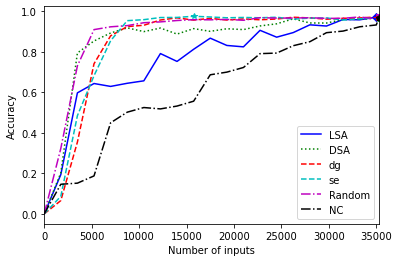

In [109]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
#plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()

35000 0.9705507159233092
35287 0.967491090297699
35000 0.9714431166648864
15750 0.9750127196311952
35287 0.973100483417511
35287 0.9682559967041016


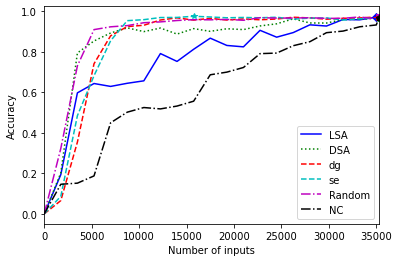

In [20]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
#plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()